In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('/home/tsoien/github/newML/backend/data/Disease_symptom_and_patient_profile_dataset.csv')

# Display the shape of the dataframe
df.shape

(349, 10)

In [28]:
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.columns = [rename_col(c) for c in df.columns]

In [29]:
# Process the columns for analysis
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty_Breathing']
for c in cols:
    df[c] = df[c].apply(lambda x: 1 if x == 'Yes' else 0)

# Filter positive cases
p = df[df.Outcome_Variable == 'Positive'].copy()

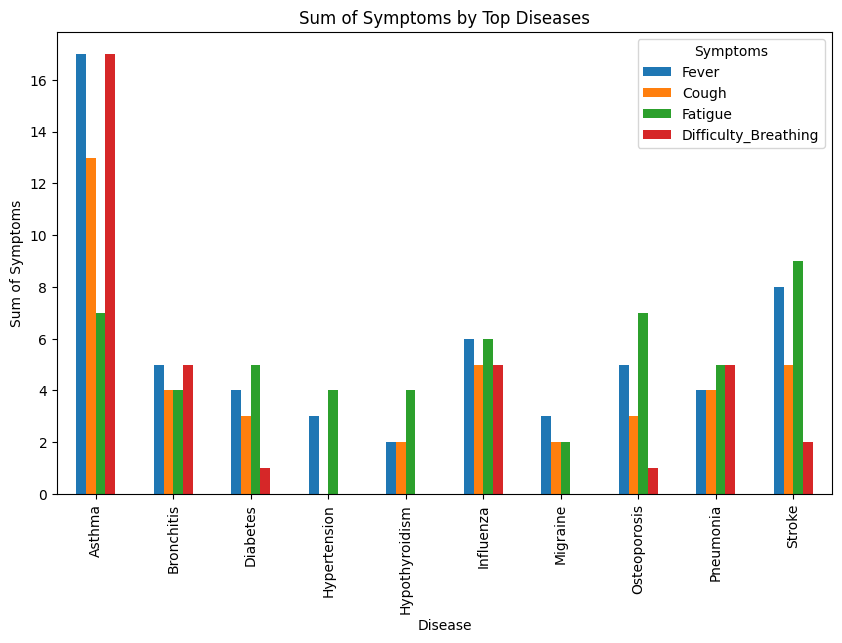

In [30]:
# Visualization 1: Histogram for sum of symptoms by top diseases
symptom_sum = (
    p[p.Disease.isin(p.Disease.value_counts().nlargest(10).index)]
    .groupby('Disease')[cols]
    .sum()
)

symptom_sum.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Symptoms by Top Diseases')
plt.ylabel('Sum of Symptoms')
plt.xlabel('Disease')
plt.legend(title='Symptoms')
plt.show()


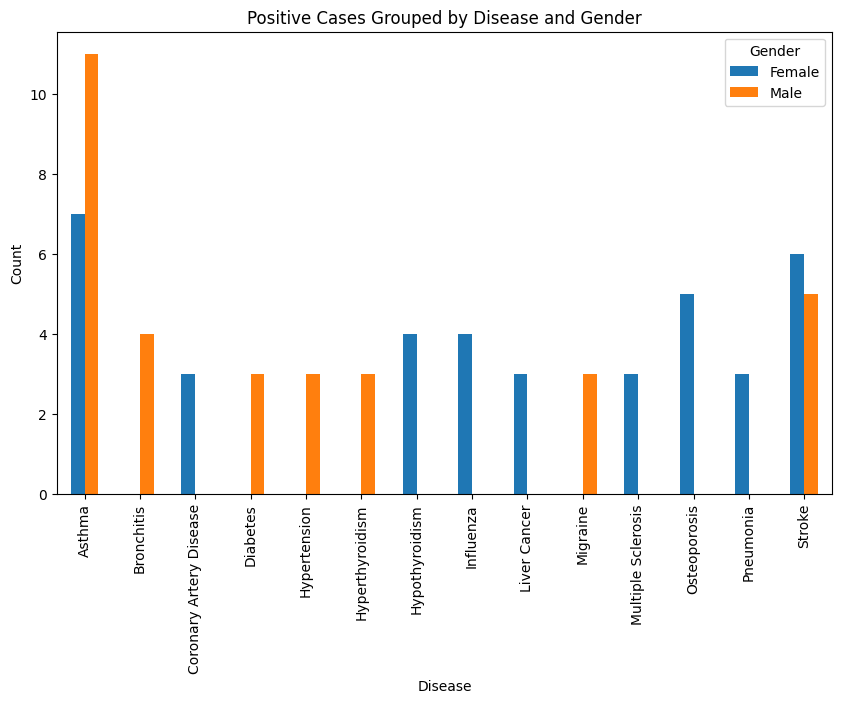

In [31]:
# Visualization 2: Histogram for positive cases grouped by disease and gender
gender_counts = p.groupby(['Disease', 'Gender']).size()
gender_counts = gender_counts[gender_counts > 2].unstack()

gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Positive Cases Grouped by Disease and Gender')
plt.ylabel('Count')
plt.xlabel('Disease')
plt.legend(title='Gender')
plt.show()

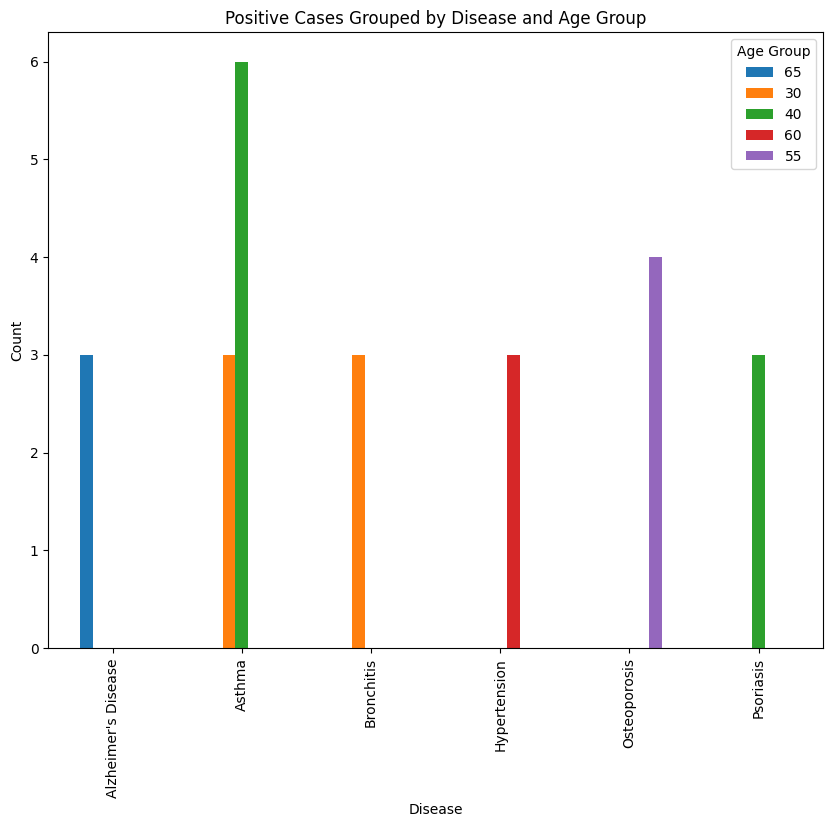

In [33]:
def age_group(x):
    if x < 13:
        return 'kid'
    elif x < 20:
        return 'teen'
    elif x <= 60:
        return 'adult'
    else:
        return 'senior'

df['Age'] = df.Age.apply(age_group)

# Visualization 3: Histogram for positive cases grouped by disease and age group
age_group_counts = p.groupby(['Disease', 'Age']).size()
age_group_counts = age_group_counts[age_group_counts > 2].unstack()

age_group_counts.plot(kind='bar', figsize=(10, 8))
plt.title('Positive Cases Grouped by Disease and Age Group')
plt.ylabel('Count')
plt.xlabel('Disease')
plt.legend(title='Age Group')
plt.show()

In [ ]:
p.Blood_Pressure.value_counts()

In [ ]:
for d in p.Disease.unique():
    s = p[p.Disease == d].groupby('Blood_Pressure').size()
    if (s >= 5).any():
        s.to_frame().plot(kind='bar', title=d)

In [ ]:
p.Cholesterol_Level.value_counts()

In [ ]:
for d in p.Disease.unique():
    s = p[p.Disease == d].groupby('Cholesterol_Level').size()
    if (s >= 5).any():
        s.to_frame().plot(kind='bar', title=d)

In [ ]:
df.groupby(['Gender', 'Outcome_Variable']).size().unstack().plot(kind='bar')

In [ ]:
df.groupby(['Age_Group', 'Outcome_Variable']).size().unstack().plot(kind='bar')

In [ ]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty_Breathing']
t = df[cols].copy()
t['Total'] = t.sum(axis=1)
t = t[t.Total > 1].copy()

symptom_combinations = t[cols].astype(str).agg('-'.join, axis=1)
symptom_combinations.value_counts(normalize=True).plot(kind='bar', xlabel='Fever-Cough-Fatigue-Difficulty_Breathing')

In [ ]:
for d in p.Disease.unique():
    s = p[p.Disease == d].groupby('Gender').size()
    if s.max() / s.min() >= 2:
        s.to_frame().plot(kind='bar', title=d)

In [ ]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty_Breathing']
for c in cols:
    print(f'{c} is associated with {df[df[c] == 1].Disease.unique().size} diseases')